# Wind correlation with water mass volumes are analyzed here

Make sure to run the Python notebooks in the following order:
1. MEOP_Preprocessing_data_SO.ipynb - if you want to generate the dfmg.csv from scratch yourself. Else, use the file provided.
2. MEOP_Analysis_Part1_OSFcopy.ipynb
3. WaterMassThickness_OSFcopy.ipynb
4. Wind_Stress_Analysis_OSFcopy.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import numpy.ma as ma

In [2]:
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 

In [24]:
waterMassThickness = pd.read_csv("./waterMassThickness_20.csv")
del(waterMassThickness["Unnamed: 0"])

In [4]:
waterMassThickness

,DSW,DSW_CI,ISW,ISW_CI,LSSW,LSSW_CI,mCDW,mCDW_CI,CDW,CDW_CI,zlowest,month,region
0,0.000000,[0. 0.],21.760023,[ 0. 21.76002277],43.520046,[43.52004555 65.28006832],0.000000,[0. 0.],0.000000,[0. 0.],174.080182,1,WS-NIS
1,40.203657,[ 0. 60.30548615],201.018287,[120.6109723 241.22194461],100.509144,[ 60.30548615 120.6109723 ],20.101829,[-20.10182872 40.20365743],0.000000,[0. 0.],743.767663,2,WS-NIS
2,163.741292,[102.33830756 225.14427664],184.208954,[143.27363059 245.61193815],102.338308,[ 81.87064605 122.80596908],0.000000,[-20.46766151 0. ],0.000000,[0. 0.],716.368153,3,WS-NIS
3,80.117833,[ 40.05891642 140.20620747],220.324040,[160.23566568 240.35349852],160.235666,[140.20620747 200.2945821 ],60.088375,[ 20.02945821 100.14729105],0.000000,[0. 0.],701.031037,4,WS-NIS
4,20.097348,[ 0. 20.09734802],200.973480,[180.87613217 200.97348019],140.681436,[120.58408812 140.68143613],120.584088,[100.4867401 140.68143613],0.000000,[0. 0.],683.309833,5,WS-NIS
5,40.648793,[ 0. 81.29758583],345.514740,[304.86594684 406.48792913],182.919568,[142.27077519 203.24396456],60.973189,[ 40.64879291 101.62198228],0.000000,[0. 0.],752.002669,6,WS-NIS
6,0.000000,[0. 0.],341.225808,[301.08159556 401.44212741],140.504745,[120.43263822 200.72106371],120.432638,[100.36053185 160.57685096],0.000000,[0. 0.],742.667936,7,WS-NIS
7,0.000000,[-40.82694469 0. ],551.163753,[530.75028091 714.47153199],0.000000,[0. 0.],0.000000,[0. 0.],0.000000,[0. 0.],836.952366,8,WS-NIS
8,60.346899,[ 20.11563303 100.57816516],724.162789,[704.04715615 804.62532131],0.000000,[0. 0.],0.000000,[0. 0.],0.000000,[0. 0.],824.740954,9,WS-NIS
9,0.000000,[0. 0.],122.476316,[ 81.65087731 204.12719328],0.000000,[-61.23815798 0. ],0.000000,[0. 0.],0.000000,[0. 0.],387.841667,10,WS-NIS


<IPython.core.display.Javascript object>


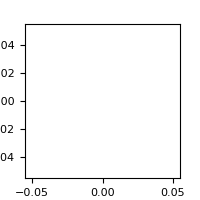

In [415]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

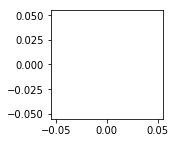

In [427]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

## Provide path to ERA interim data folder below

In [35]:
!ls ../../../Winds/ERA_interim/ -1 > ../../../Winds/list_files.txt

In [36]:
!ls ../../../Winds/ERA_interim/ -1

winds2004_monthly.nc
winds2005_monthly.nc
winds2006_monthly.nc
winds2007_monthly.nc
winds2008_monthly.nc
winds2009_monthly.nc
winds2010_monthly.nc
winds2011_monthly.nc
winds2012_monthly.nc
winds2013_monthly.nc
winds2014_monthly.nc
winds2015_monthly.nc
winds2016_monthly.nc
winds2017_monthly.nc


In [5]:
winds = []
with open("../../../Winds/list_files.txt") as file_list:
    for line in file_list:
        winds.append(xr.open_dataset("../../../Winds/ERA_interim/"+line.split("\n")[0]))

In [13]:
winds[5]

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 2009-01-01 2009-02-01 2009-03-01 ...
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    iews       (time, latitude, longitude) float32 ...
    inss       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-09-18 08:53:22 GMT by grib_to_netcdf-2.8.0: grib_to_ne...

In [6]:
# This function is not used, instead, iews and inss are used.

def compute_stress(U):
    C_D = np.ones(U.shape) * 1.2e-3
    C_D = np.where((U > 4) & (U < 11), 1.2e-3,0.0 )
    indices = np.argwhere(((U>=11) & (U<25)))
    indrav = np.ravel(indices)
    C_D[indrav[::3], indrav[1::3], indrav[2::3]] = 1e-3* (0.49 + 0.065 * U[indrav[::3], indrav[1::3], indrav[2::3]])
    
    return C_D * 1.22 * U**2

In [7]:
def compute_clim_stress_curl(winds):
    stress_curl_clim = np.zeros_like(winds[0].iews)
    iews_clim = np.zeros_like(winds[0].iews)
    inss_clim = np.zeros_like(winds[0].iews)
    tauy_x = np.zeros_like(winds[0].iews)
    taux_y = np.zeros_like(winds[0].iews)
    
    for i in range(len(winds)):
        for mon in range(12):
            iews_clim[mon] += winds[i].iews[mon].values
            inss_clim[mon] += winds[i].inss[mon].values
    for mon in range(12):
        iews_clim[mon] = iews_clim[mon] / float(len(winds))
        inss_clim[mon] = inss_clim[mon] / float(len(winds))
        
    delta_lat = abs(float(winds[0].latitude[0] - winds[0].latitude[1]))
    delta_lon = abs(float(winds[0].longitude[0] - winds[0].longitude[1]))
    r = 6371e3 # radius of earth in metres
    dy = abs(float(r * np.deg2rad(delta_lat)))
    
    for mon in range(12):
        for lati in range(len(winds[0].latitude)):
            dx = abs(float(r * np.cos(np.deg2rad(winds[0].latitude[lati]) ) * delta_lon))
            tauy_x[mon][lati, :] = np.gradient(inss_clim[mon][lati,:], dx)
        _, taux_y[mon] = np.gradient(iews_clim[mon][:, :], dx, dy )
        stress_curl_clim[mon] = tauy_x[mon] - taux_y[mon]
        
    return stress_curl_clim

In [8]:
stress_curl_clim = compute_clim_stress_curl(winds)

In [9]:
import plot_topView_contourf as topView
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_topView_contourf.py'>

In [11]:
mWhole = topView.createMapProjections(-90, 0, region="Whole")

In [12]:
from matplotlib import ticker, cm
def plot_scalar_field(sclr, lons, lats, m=None, bathy=None, plotBathy=True, save=False, savename="untitled.png", 
                     levs=None, drawMeridians=True, meridians=None, units=None, extend="both", cmap="coolwarm",
                     annotate=True, fontsize=8):
    plt.close(1)
    fig = plt.figure(1, figsize=(10,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 0.05])
    mapax = plt.subplot(gs[0,0])
    if(annotate == True):
        parallels = np.arange(-80, -50+1, 5.)    
        m.drawparallels(parallels,labels=[0,0,0,0], linewidth=0.2) # labels: left,right,top,bottom
        
        xy = [[-140, -55], [-140, -60] , [-140, -65], [-140, -70], [-140, -75] , [-140, -80]]
        xytext = np.arange(55, 81, 5)
        for i in range(len(xytext)):
            mxy = m(xy[i][0], xy[i][1])
            plt.annotate(str(xytext[i])+"$^o$S", xy=(mxy[0], mxy[1]), rotation=-45, fontsize=fontsize)    
            
    colorbar_ax = plt.subplot(gs[1,0])
    
    if plotBathy:
        bathycolorbar = plt.subplot(gs[0, 1])
    
    X, Y = np.meshgrid(lons, lats)
    
    if not m:
        m = topView.createMapProjections(-90, 0, region="Whole")
        
    CF = m.contourf(X, Y, sclr, ax=mapax, latlon=True, levels=levs, extend=extend, cmap=cmap, origin="lower")
    cbar1 = Colorbar(ax = colorbar_ax, mappable = CF, orientation = 'horizontal')
    cbar1.ax.set_xlabel(units)
    
    if(plotBathy == True):
        if not bathy:
            bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')
        lonlen = len(bathy.lon)
        lonindices = np.arange(0, lonlen+1, 30)
        lonindices[-1] = lonindices[-1] - 1
        bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 5))
        clevs = np.array([-100, -500, -1000, -1500, -2000, -3000])[::-1]
        
        longrid, latgrid = np.meshgrid(bathyS.lon.values, bathyS.lat.values)
        cs = m.contour(longrid, latgrid, bathyS.elevation.where(bathyS.elevation <= 0).values,  latlon=True, 
                       levels=clevs, linewidths=0.2, extend='min', ax=mapax ) #, cmap="RdYlBu"
        cbar1 = Colorbar(ax = bathycolorbar, mappable = cs, orientation = 'vertical')
        cbar1.ax.get_children()[0].set_linewidths(5)
        cbar1.set_label('Depth (m)')
     
    m.drawcoastlines(ax=mapax)
    
    if drawMeridians:
        if not meridians:
            meridians = np.arange(-180, 180, 20)
        m.drawmeridians(meridians,labels=[1,1,1,1], linewidth=0.2, ax=mapax)
    
    if save:
        plt.savefig(savename, dpi=600)
    
    plt.show()    

In [13]:
bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')

In [14]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 30)
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

In [9]:
winds[0].longitude 

<xarray.DataArray 'longitude' (longitude: 480)>
array([   0.  ,    0.75,    1.5 , ...,  357.75,  358.5 ,  359.25], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
Attributes:
    units:      degrees_east
    long_name:  longitude

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


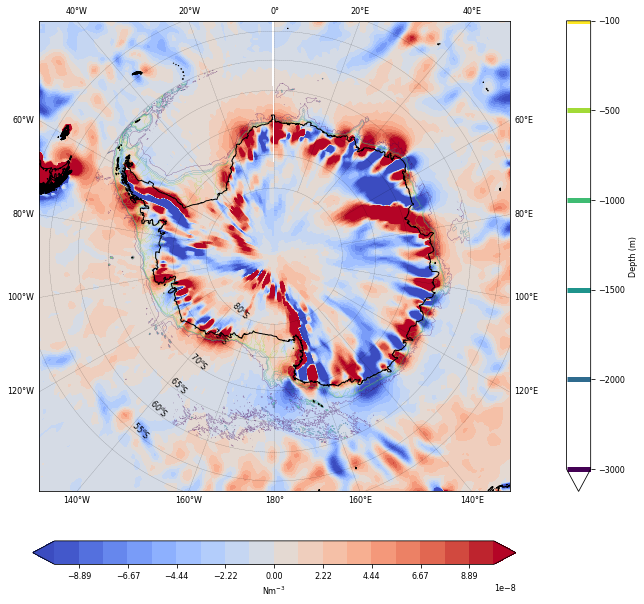

In [291]:
plot_scalar_field(np.mean(stress_curl_clim, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=np.linspace(-1e-7, 1e-7, 19), save=True, savename="./Images/wind/stress_curl_net_clim.png", 
                  drawMeridians=True, plotBathy=True, units="Nm$^{-3}$")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


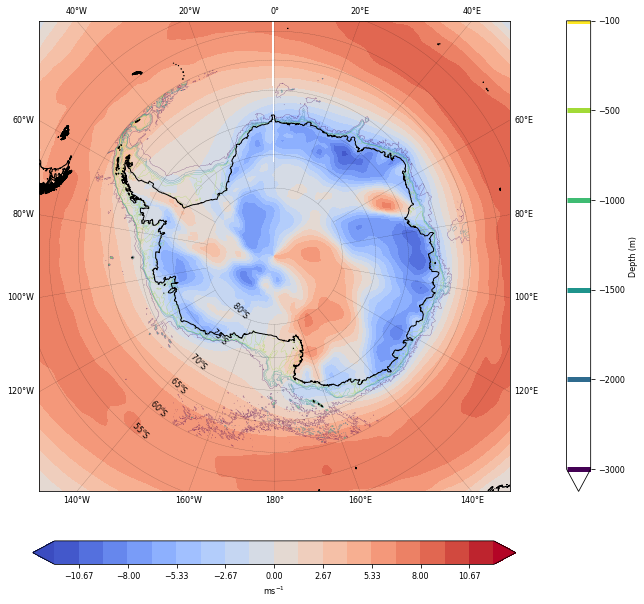

In [292]:
plot_scalar_field(np.mean(wind_clim_monthly, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=list(np.linspace(-12,12,19) ), save=True, 
                  savename="./Images/wind/U10_net_clim.png", units="ms$^{-1}$",
                  drawMeridians=True, plotBathy=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


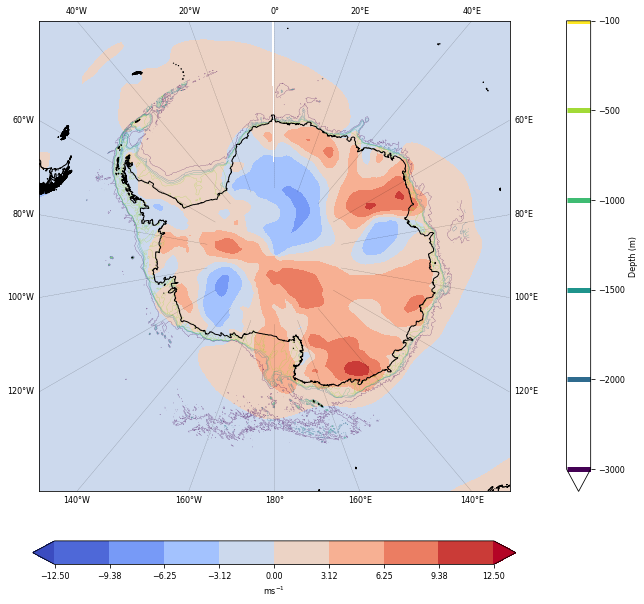

In [183]:
plot_scalar_field(np.mean(v10_clim_monthly, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=list(np.linspace(-12.5,12.5,9)), 
                  save=True, savename="./Images/wind/V10_net_clim.png", units="ms$^{-1}$",
                  drawMeridians=True, plotBathy=True)

## Computing bathymetry gradient to identify the slope

In [15]:
import plot_bathymetryGradients as pbgrad
importlib.reload(pbgrad)

<module 'plot_bathymetryGradients' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_bathymetryGradients.py'>

In [12]:
bathyS  = xr.open_dataset("/media/hdd2/SOSE_1_12/bathyS.nc")
bathy_gradient = bathyS.bathy_gradient.values

In [16]:
bathy_gradient = pbgrad.compute_bathymetryGradients(lonstep=5, latstep=1)

In [17]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 5) # lonstep=5, every 5th longitude
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

In [13]:
bathy_gradient = ma.masked_array(np.array(bathy_gradient))
bathy_gradient.mask = (bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800)

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [14]:
XX, YY = np.meshgrid(bathyS.lon, bathyS.lat)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


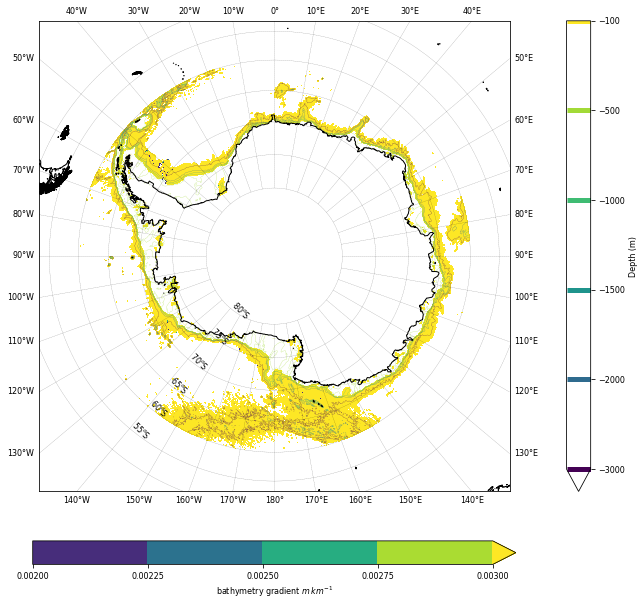

In [30]:
plot_scalar_field(bathy_gradient, bathyS.lon, bathyS.lat, m=mWhole,  
                  meridians=list(np.arange(-180, 180, 10)), levs=list(np.linspace(0.002, 3e-3, 5)), save=True,
                  units="bathymetry gradient $m\,km^{-1}$", extend="max", cmap="viridis", plotBathy=True,
                  savename="./Images/bathygradient.png")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


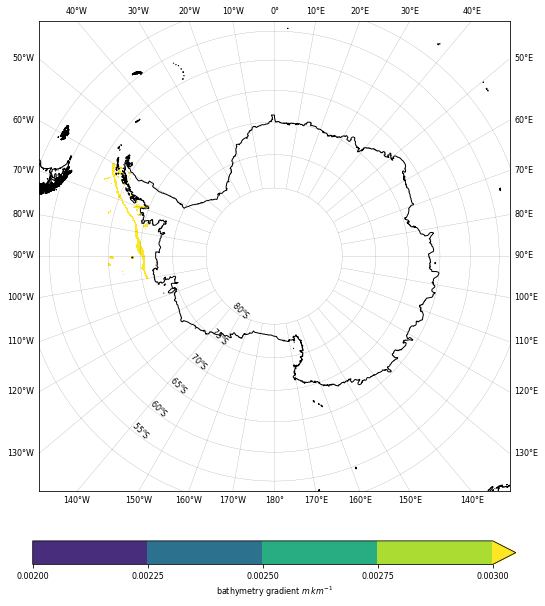

In [213]:
plot_scalar_field(ma.masked_array(np.array(bathy_gradient), mask=regionalMasks[20] ), bathyS.lon, bathyS.lat, m=mWhole,  
                  meridians=list(np.arange(-180, 180, 10)), levs=list(np.linspace(0.002, 3e-3, 5)), 
                  units="bathymetry gradient $m\,km^{-1}$", extend="max", cmap="viridis", plotBathy=False,
                 save=True, savename="./Images/arbit.png")

In [15]:
def compute_clim_monthly(winds, var="u10"):
    
    no_years = len(winds)
    
    wind_clim_monthly = [0]*12
    
    for i in range(no_years):
        for mon in range(12):
            wind_clim_monthly[mon] += winds[i][var].values[mon]
    
    for mon in range(12):
        wind_clim_monthly[mon] = wind_clim_monthly[mon] / float(no_years)
        
    return wind_clim_monthly

In [16]:
u10_clim_monthly = compute_clim_monthly(winds)

In [17]:
v10_clim_monthly = compute_clim_monthly(winds, var="v10")

# Converting from 0$^o$ - 360$^o$ longitudes to -180$^o$ to +180$^o$ longitudes

In [18]:
wXX, wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)

In [19]:
wXX[wXX > 180] = wXX[wXX > 180] - 360
wXX[0]

array([   0.  ,    0.75,    1.5 ,    2.25,    3.  ,    3.75,    4.5 ,
          5.25,    6.  ,    6.75,    7.5 ,    8.25,    9.  ,    9.75,
         10.5 ,   11.25,   12.  ,   12.75,   13.5 ,   14.25,   15.  ,
         15.75,   16.5 ,   17.25,   18.  ,   18.75,   19.5 ,   20.25,
         21.  ,   21.75,   22.5 ,   23.25,   24.  ,   24.75,   25.5 ,
         26.25,   27.  ,   27.75,   28.5 ,   29.25,   30.  ,   30.75,
         31.5 ,   32.25,   33.  ,   33.75,   34.5 ,   35.25,   36.  ,
         36.75,   37.5 ,   38.25,   39.  ,   39.75,   40.5 ,   41.25,
         42.  ,   42.75,   43.5 ,   44.25,   45.  ,   45.75,   46.5 ,
         47.25,   48.  ,   48.75,   49.5 ,   50.25,   51.  ,   51.75,
         52.5 ,   53.25,   54.  ,   54.75,   55.5 ,   56.25,   57.  ,
         57.75,   58.5 ,   59.25,   60.  ,   60.75,   61.5 ,   62.25,
         63.  ,   63.75,   64.5 ,   65.25,   66.  ,   66.75,   67.5 ,
         68.25,   69.  ,   69.75,   70.5 ,   71.25,   72.  ,   72.75,
         73.5 ,   74

In [20]:
u10_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    u10_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                               u10_clim_monthly[i].flatten(), 
                                      (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [21]:
v10_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    v10_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                              v10_clim_monthly[i].flatten(), 
                                    (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [22]:
stress_curl_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    stress_curl_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                                      stress_curl_clim[i].flatten(), 
                                             (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [354]:
## Plays a beep sound. Useful to notify once any script is done running
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

In [27]:
def compute_monthly_clim_means_lonlimited_slope(lonlim, latlim, wind_interpd = stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ~((~bathy_gradient.mask) &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean, wind_interpd[0].mask

In [28]:
def compute_monthly_clim_means_lonlimited(lonlim, latlim, wind_interpd = stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ((bathyS.elevation > 0) | 
                                                            ~((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean

In [29]:
waterMassThickness["stress_curl_slope_MonMean"] = 0.0

In [31]:
waterMassThickness.loc[waterMassThickness.region.str.contains("A2"), "region"].unique()

array([], dtype=object)

In [32]:
waterMassThickness.loc[waterMassThickness.region.str.contains("A1"), "region"].unique()

array([], dtype=object)

In [30]:
import re
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

wmA2regions = waterMassThickness.region.str.contains("DIS")
regionsA2 = waterMassThickness.loc[wmA2regions, "region"].unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-77., -72], [-68., -66.47], [-69.75, -66.35],
                   [-69.75, -65.215], [-67.25, -65.4], [-78., -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-72.5, -69], [-70.5, -65.38], [-67., -65.56], 
                   [-67., -64.5], [-75.25, -70.7], [-74., -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == regionsA2[i])
    
    u10MonMean = compute_monthly_clim_means_lonlimited([regionsLonlim[i][0],regionsLonlim[i][1]], 
                                                       [regionsLatlim[i][0], regionsLatlim[i][1]],
                                                                      wind_interpd=u10_clim_monthly_interpd)
    
    v10_MonMean = compute_monthly_clim_means_lonlimited([regionsLonlim[i][0], regionsLonlim[i][1]],
                                                        [regionsLatlim[i][0], regionsLatlim[i][1]],
                                                                      wind_interpd=v10_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMaskA1, "u10MonMean"] = u10MonMean
    waterMassThickness.loc[wmRegionMaskA2, "u10MonMean"] = u10MonMean
    
    waterMassThickness.loc[wmRegionMaskA1, "v10MonMean"] = v10_MonMean
    waterMassThickness.loc[wmRegionMaskA2, "v10MonMean"] = v10_MonMean

In [31]:
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()
regionsA1

array(['WS-NIS', 'CD-NIS', 'WPB-NIS', 'EPB-NIS', 'AC-NIS', 'RS-NIS',
       'PMC-NIS', 'PHC-NIS', 'LAC-NIS', 'KC-NIS', 'AS-NIS', 'BS-NIS'],
      dtype=object)

In [32]:
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

wmA2regions = waterMassThickness.region.str.contains("DIS")
regionsA2 = waterMassThickness.loc[wmA2regions, "region"].unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],
                   [-66.9, -65.215], [-66, -65.4], [-73.45, -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-73.15, -69], [-69.44, -65.38], [-66.18, -65.56], 
                   [-65.55, -64.5], [-72.7, -70.7], [-71, -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == regionsA2[i] )
    
    u10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]], 
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=u10_clim_monthly_interpd)
    v10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=v10_clim_monthly_interpd)
    windStressCurl_MonMeanRegional, regionalMasks[i] = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=stress_curl_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMaskA1, "u10SlopeMonMean"] = u10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "u10SlopeMonMean"] = u10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "v10SlopeMonMean"] = v10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "v10SlopeMonMean"] = v10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    
waterMassThickness["neg_u10SlopeMonMean"] = -waterMassThickness.u10SlopeMonMean
waterMassThickness["neg_stress_curl"] = -waterMassThickness.stress_curl_slope_MonMean

In [587]:
play_beep()

In [33]:
waterMassThickness.to_csv("waterMassThickness_20_winds.csv")

In [ ]:
coldRegimeRegionsA1 = ["WSA1", 'CDA1', "WPBA1", "EPBA1", 'ACA1', "RSA1"]
coldRegimeRegionsA2 = ["WSA2", 'CDA2', "WPBA2", "EPBA2", 'ACA2', "RSA2"]

coldRegimeWideShelfRegionsA1 = ["WSA1", "WPBA1", "EPBA1", "RSA1"]
coldRegimeWideShelfRegionsA2 = ["WSA2", "WPBA2", "EPBA2", "RSA2"]

coldRegimeNarrowShelfRegionsA1 = ["CDA1", "ACA1"]
coldRegimeNarrowShelfRegionsA2 = ["CDA2", "ACA2"]

lsswRegimeRegionsA1 = ["PMCA1", "LACA1", "KCA1"]
lsswRegimeRegionsA2 = ["PMCA2", "LACA2", "KCA2"]

warmRegimeRegionsA1 = ["PHCA1", "ASA1", "BSA1"]
warmRegimeRegionsA2 = ["PHCA2", "ASA2", "BSA2"]

In [ ]:
waterMassThickness.loc[wmColdRegimeMaskA1, "CDW"].count()

In [ ]:
waterMassThickness["allCDW"] = waterMassThickness.CDW + waterMassThickness.mCDW

In [ ]:
count = np.zeros(8)

coldRegimeCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeRegionsA1)].corr()

wmColdRegimeMaskA2 = waterMassThickness.region.isin(coldRegimeRegionsA2)
coldRegimeCorrA2 = waterMassThickness.loc[wmColdRegimeMaskA2].corr()

wmColdRegimeWideShelfMaskA1 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)
coldRegime_WideShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)].corr()
count[0] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1), "CDW"].count()

wmColdRegimeWideShelfMaskA2 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)
coldRegime_WideShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)].corr()
count[4] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2), "CDW"].count()

wmColdRegimeNarrowShelfMaskA1 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)
coldRegime_NarrowShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)].corr()
count[1] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1), "CDW"].count()

wmColdRegimeNarrowShelfMaskA2 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)
coldRegime_NarrowShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)].corr()

wmLSSWRegimeMaskA1 = waterMassThickness.region.isin(lsswRegimeRegionsA1)
lsswRegimeCorrA1 = waterMassThickness.loc[wmLSSWRegimeMaskA1].corr()

wmLSSWRegimeMaskA2 = waterMassThickness.region.isin(lsswRegimeRegionsA2)
lsswRegimeCorrA2= waterMassThickness.loc[wmLSSWRegimeMaskA2].corr()

wmWarmRegimeMaskA1 = waterMassThickness.region.isin(warmRegimeRegionsA1)
warmRegimeCorrA1 = waterMassThickness.loc[wmWarmRegimeMaskA1].corr()

wmWarmRegimeMaskA2 = waterMassThickness.region.isin(warmRegimeRegionsA2)
warmRegimeCorrA2 = waterMassThickness.loc[wmWarmRegimeMaskA2].corr()

In [ ]:
!mkdir ./Images/wind2

In [ ]:
regionMasks = [wmColdRegimeWideShelfMaskA1, wmColdRegimeNarrowShelfMaskA1, wmLSSWRegimeMaskA1, wmWarmRegimeMaskA1]
regimes = ["cold, wide  ", "cold, narrow", "Intermediate", "Warm regime "]
plt.close(1)
fig = plt.figure(1)
ax = plt.subplot()
axr = ax.twinx()
for i in range(len(regionMasks)):
    if(i == 0):
        label = ["-U$_{slope}$", "V", "-$( \\vec{\\nabla} \\times \\vec{\\tau} )_{slope}$"]
    else:
        label = [None]*3
    wth = 0.1
    lns1 = ax.bar(i+1 - 1.*wth, -waterMassThickness.loc[regionMasks[i], "u10SlopeMonMean"].mean(), width=wth, 
           color='b', label= label[0])
    lns2 = ax.bar(i+1 - 0*wth, waterMassThickness.loc[regionMasks[i], "v10MonMean"].mean(), width=wth, 
           color='g', label= label[1])
    lns3 = axr.bar(i+1 + 1.*wth, -waterMassThickness.loc[regionMasks[i], "stress_curl_slope_MonMean"].mean(),width=wth, 
            color='r', label= label[2])
    if(i == 0):
        lns = list(lns1+lns2+lns3).copy()
        labs = [l.get_label() for l in lns]
        ax.legend(lns, label)
        
ax.set_ylim(-5, 5)    
ax.set_yticks(np.arange(-5, 6, 1) )
ax.axhline(y=0, color='k')
axr.set_ylim(-1.7e-7, 1.7e-7)
axr.set_yticks(np.linspace(-1.7e-7, 1.7e-7, 10) )
ax.set_xticks(np.arange(1,5,1))
ax.set_xticklabels(["Cold\n wide", "Cold\n narrow", "LSSW", "Warm"])
ax.grid()
ax.set_ylabel("-U$_{slope}$, V$_{slope}$")
axr.set_ylabel("-$( \\vec{\\nabla} \\times \\vec{\\tau} )$")
plt.tight_layout()
plt.savefig("./Images/wind2/magnitudes_regimeMean.png", dpi=600)
plt.show()

In [ ]:
stats.pearsonr(waterMassThickness.DSW.dropna(), waterMassThickness.CDW.dropna())

In [39]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.nan_to_num(np.tanh((lo_z, hi_z)))
    return r, round(p,4), lo, hi, np.nan_to_num(np.array([lo,hi]))

In [40]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df, alpha=0.05, retValue="r"):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    CI_lo = dfcols.transpose().join(dfcols, how='outer')
    CI_hi = dfcols.transpose().join(dfcols, how='outer')
    CI = dfcols.transpose().join(dfcols, how='outer')
    yerr = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c], pvalues[r][c], CI_lo[r][c], CI_hi[r][c], CI[r][c] = pearsonr_ci(df[r], df[c], alpha=alpha)
            yerr[r][c] = [(rvalues[r][c] - CI_lo[r][c]), (CI_hi[r][c] - rvalues[r][c]) ]
            #1-round(pearsonr(df[r], df[c])[1], 4)
    yerr = yerr.fillna(-1e10)
    print(type(yerr))
    try:
        if retValue == "r":
            return rvalues
        if(retValue == "p"):
            return pvalues
        if(retValue == "lo"):
            return CI_lo
        if(retValue == "hi"):
            return CI_hi
        if(retValue == "CI"):
            return CI
        if(retValue == "yerr"):
            return yerr.fillna(1e10)
    except:
        raise ValueError('retValue should be one of r,p,lo,hi')

In [92]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean', 'neg_u10SlopeMonMean',
       'neg_stress_curl', 'ShelfWidth', 'DSW_CI', 'ISW_CI', 'LSSW_CI',
       'CDW_CI', 'mCDW_CI'],
      dtype='object')

## Computing the distance from ice shelf break to the continental shelf break

Function which returns a mask on the bathyS grid which selects points that are 
1. on the slope 
2. within the lon limits of the regions being studied
3. within lat limits to avoid points from on the shelf being selected

In [36]:
def compute_lonlat_limited_mask(lonlim, latlim, XX=XX, YY=YY):
    mask = np.zeros_like(np.array(XX), dtype=bool)
    
    mask = ((~bathy_gradient.mask) &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) ) & (YY > latlim[0]) & (YY < latlim[1]) )  #
    return mask

In [37]:
def compute_lonlat_limited_mask_whole(lonlim, latlim, XX=XX, YY=YY):
    mask = np.zeros_like(np.array(XX), dtype=bool)
    #bathy_gradient.mask = (bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800)
    for i in range(len(lonlim)):
        mask = mask | ((~bathy_gradient.mask) &
                       ((XX > lonlim[i][0]) & (XX < lonlim[i][1]) & (YY > latlim[i][0])
                                                              & (YY < latlim[i][1])) ) #
    return mask

In [38]:
lonlat_limited_mask_whole = compute_lonlat_limited_mask_whole(regionsLonLim, regionsLatlim)

NameError: name 'regionsLonLim' is not defined

iceShelfBreakLine is the polyline with points along the ice shelf break

In [39]:
iceShelfBreakLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntIceShelfEdge/ne_10m_antarctic_ice_shelves_lines.shp")
grndLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntarcticGroundingLine/GSHHS_f_L6.shp")

In [40]:
grndLine = grndLine.to_crs({"init":"epsg:3031"})
iceShelfBreakLine = iceShelfBreakLine.to_crs({"init":"epsg:3031"})

In [41]:
isGLPoints = []
for i in range(len(iceShelfBreakLine)):
    try:
        isGLPoints = isGLPoints + list(iceShelfBreakLine.geometry[i].coords)
    except:
        isGLPoints = isGLPoints + list(iceShelfBreakLine.geometry[i][0].coords)
for i in range(len(grndLine) ):
    isGLPoints = isGLPoints + list(grndLine.geometry[i].exterior.coords)

In [63]:
np.array(isGLPoints)[:, 1]

array([-66.86041473, -66.84444671, -66.79633595, ..., -77.301005  ,
       -77.30202   , -77.303046  ])

In [42]:
def distance(s_lng, s_lat, e_lng, e_lat):
    
    # approximate radius of earth in km
    R = 6371.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2.0)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2.0)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [43]:
from scipy.spatial.distance import cdist
from haversine import haversine
from pyproj import Proj
from scipy import spatial

In [44]:
isGLTree = spatial.KDTree(isGLPoints)

In [92]:
import mpl_toolkits.basemap.pyproj as pyproj

In [45]:
import pyproj
utmAnt = pyproj.Proj("+init=EPSG:3031")

In [46]:
regionsList = np.array(["WS", "CD", "WPB", "EPB", "AC", "RS", "PMC", "PHC", "LAC", "KC", "AS", "BS"])
regionsLonLim = np.array([[-40, -20], [60, 70], [70,75], [75,82], [135,145], [160,180], [-20, 0], [29, 37], [82, 87], 
                 [101, 112], [-120, -100], [-100, -60] ])

regionsLatLim = np.array([[-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],  [-70, -65], [-66, -65.4], [-73.45, -70],
                 [-75, -68], [-69.44, -65.38], [-70, -65],[-65.55, -64.5], [-72.7, -70.7], [-71, -61.4] ])

mean_shelf_width = np.zeros(len(regionsLonLim))



for i in range(len(regionsLonLim)):
    lonLatLimitedMask = compute_lonlat_limited_mask(regionsLonLim[i], regionsLatLim[i])
    
    points_on_slope = np.array([XX[lonLatLimitedMask].flatten(), YY[lonLatLimitedMask].flatten()]).T
    
    for j in range(len(points_on_slope) ):
        points_on_slope[j] = Point(utmAnt(points_on_slope[j][0], points_on_slope[j][1]))
        
    mean_shelf_width[i] = np.nansum(isGLTree.query(points_on_slope)[0]) / float(len(points_on_slope) )
    print(regionsList[i], len(points_on_slope), mean_shelf_width[i])

WS 78785 209363.37602648637
CD 10085 110358.31033764637
WPB 5941 191707.95190378584
EPB 29566 256533.7694958047
AC 5609 135853.3184697267
RS 68467 188521.1608081439
PMC 64226 86571.65972100674
PHC 30455 162648.01160774854
LAC 12459 122072.8896695795
KC 17540 125561.8967853958
AS 37362 256309.92809227697
BS 121729 257725.80992257278


In [63]:
list(zip(list(mean_shelf_width/1e3), list(regionsList)))

[(209.36337602648638, 'WS'),
 (110.35831033764637, 'CD'),
 (191.70795190378584, 'WPB'),
 (256.53376949580473, 'EPB'),
 (135.8533184697267, 'AC'),
 (188.52116080814392, 'RS'),
 (86.57165972100674, 'PMC'),
 (162.64801160774854, 'PHC'),
 (122.0728896695795, 'LAC'),
 (125.5618967853958, 'KC'),
 (256.30992809227695, 'AS'),
 (257.72580992257275, 'BS')]

In [67]:
waterMassThickness["ShelfWidth"] = 0.0
for i in range(len(regionsList)):
    maskRegions = (waterMassThickness.region == regionsList[i]+"-NIS")
    maskRegions = maskRegions | (waterMassThickness.region == regionsList[i]+"-DIS")
    
    waterMassThickness.loc[maskRegions, "ShelfWidth"] = mean_shelf_width[i] / 1e3

In [44]:
waterMassThickness.to_csv("./waterMassThickness_20_winds.csv")

In [28]:
waterMassThickness = pd.read_csv("./waterMassThickness_20_winds.csv")

wmt_winds = pd.read_csv("./waterMassThickness_20_winds.csv")

wmt_winds.columns

waterMassThickness.columns

wmt_winds["DSW"] = waterMassThickness["DSW"]
wmt_winds["DSW_CI"] = waterMassThickness["DSW_CI"]
wmt_winds["ISW"] = waterMassThickness["ISW"]
wmt_winds["ISW_CI"] = waterMassThickness["ISW_CI"]
wmt_winds["LSSW"] = waterMassThickness["LSSW"]
wmt_winds["LSSW_CI"] = waterMassThickness["LSSW_CI"]
wmt_winds["mCDW"] = waterMassThickness["mCDW"]
wmt_winds["mCDW_CI"] = waterMassThickness["mCDW_CI"]
wmt_winds["CDW"] = waterMassThickness["CDW"]
wmt_winds["CDW_CI"] = waterMassThickness["CDW_CI"]

wmt_winds.to_csv("./waterMassThickness_20_winds.csv")

In [46]:
waterMassThicknessA1 = waterMassThickness[waterMassThickness.region.str.contains("NIS")]
waterMassThicknessA2 = waterMassThickness[waterMassThickness.region.str.contains("DIS")]

In [30]:
print(waterMassThicknessA1["DSW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["DSW"].corr(waterMassThickness["ShelfWidth"]))

0.05361200517472999 , 0.1078737820374548


In [31]:
print(waterMassThicknessA1["CDW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["CDW"].corr(waterMassThickness["ShelfWidth"]))

0.5172321599866743 , 0.3615775923221603


In [32]:
print(waterMassThicknessA1["mCDW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["mCDW"].corr(waterMassThickness["ShelfWidth"]))

-0.34194106182727174 , -0.2172658352737022


In [33]:
print(waterMassThicknessA1["LSSW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["LSSW"].corr(waterMassThickness["ShelfWidth"]))

-0.35419551074270667 , -0.4125603316050158


In [34]:
print(waterMassThicknessA1["ISW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["ISW"].corr(waterMassThickness["ShelfWidth"]))

0.14228809761436056 , 0.09788129923663491


In [35]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:935: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


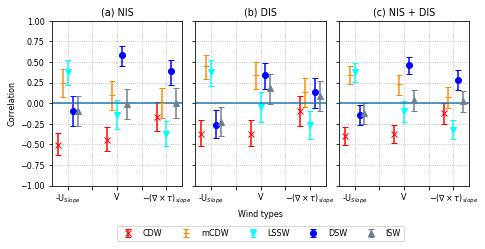

In [36]:
regionsNames = ["NIS", "DIS", "IS"]

titles1 = ["(a) NIS", "(b) DIS", "(c) NIS + DIS"] 

pltwmthk.plot_WaterMass_Correlation_byRegion_CI(waterMassThickness, regionsName=regionsNames, titles=titles1, save=True, 
                                    savename="./Images/waterMassBudgets2/windWaterMassCorrelation_A1_A2.png", 
                                                mrows=1, ncols=3, ht=4)

In [37]:
selA1 = waterMassThickness.region.str.contains("NIS")
selA2 = waterMassThickness.region.str.contains("DIS")

In [50]:
calculate_pvalues(waterMassThickness.dropna(), retValue="r")

<class 'pandas.core.frame.DataFrame'>


/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month,stress_curl_slope_MonMean,u10MonMean,v10MonMean,u10SlopeMonMean,v10SlopeMonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
DSW,1,0.137747,-0.214444,-0.250944,-0.290147,-0.0963923,0.106273,-0.284221,0.280937,0.46558,0.146184,0.540598,-0.146184,0.284221,0.0629838
ISW,0.137747,1,-0.0191023,-0.183749,-0.252577,-0.0577394,0.0624434,-0.023324,0.165834,0.0375393,0.124217,0.102705,-0.124217,0.023324,0.112076
LSSW,-0.214444,-0.0191023,1,0.111058,-0.247757,-0.0928825,0.102948,0.32856,-0.321104,-0.0977353,-0.377536,-0.046123,0.377536,-0.32856,-0.378384
mCDW,-0.250944,-0.183749,0.111058,1,-0.166264,0.309414,-0.186667,-0.0695763,-0.364779,0.228872,-0.348144,0.221202,0.348144,0.0695763,-0.251396
CDW,-0.290147,-0.252577,-0.247757,-0.166264,1,0.659913,-0.104828,0.123139,0.360177,-0.377669,0.402872,-0.46533,-0.402872,-0.123139,0.405559
zlowest,-0.0963923,-0.0577394,-0.0928825,0.309414,0.659913,1,-0.244405,0.0143439,0.23977,-0.0609957,0.259049,-0.115328,-0.259049,-0.0143439,0.226017
month,0.106273,0.0624434,0.102948,-0.186667,-0.104828,-0.244405,1,0.0580261,-0.0468345,-0.0743367,-0.0320605,-0.0801184,0.0320605,-0.0580261,-0.0205304
stress_curl_slope_MonMean,-0.284221,-0.023324,0.32856,-0.0695763,0.123139,0.0143439,0.0580261,1,0.0640143,-0.771732,0.0907713,-0.675543,-0.0907713,-1,0.150496
u10MonMean,0.280937,0.165834,-0.321104,-0.364779,0.360177,0.23977,-0.0468345,0.0640143,1,-0.256161,0.908709,-0.22979,-0.908709,-0.0640143,0.558205
v10MonMean,0.46558,0.0375393,-0.0977353,0.228872,-0.377669,-0.0609957,-0.0743367,-0.771732,-0.256161,1,-0.379259,0.964555,0.379259,0.771732,-0.397183


In [51]:
calculate_pvalues(waterMassThickness.dropna(), retValue="CI")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


<class 'pandas.core.frame.DataFrame'>


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month,stress_curl_slope_MonMean,u10MonMean,v10MonMean,u10SlopeMonMean,v10SlopeMonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
DSW,"[1.0, 1.0]","[0.009391297245684715, 0.2616361379596197]","[-0.333766974077449, -0.0883580946317434]","[-0.3676096852376347, -0.1265027193805394]","[-0.40361782982358996, -0.16788637057718636]","[-0.22216151758514974, 0.03253220728569867]","[-0.02255637061109679, 0.2316309516061219]","[-0.3981966683659731, -0.16160232197940785]","[0.15812519151311594, 0.3951898768572793]","[0.3585109536015439, 0.5605594355240466]","[0.018001160121100993, 0.2696399491391321]","[0.44284429278075094, 0.6256499594034696]","[-0.2696399491391321, -0.018001160121100993]","[0.16160232197940785, 0.3981966683659731]","[-0.06607247331356315, 0.18996756724367536]"
ISW,"[0.009391297245684715, 0.2616361379596197]","[1.0, 1.0]","[-0.14726224318633976, 0.10968845460060409]","[-0.3050663037254749, -0.056563507247945975]","[-0.36911673130843764, -0.1282180800718236]","[-0.1848888257735966, 0.07131128745343322]","[-0.0666126241047607, 0.1894445536533037]","[-0.15139167241282095, 0.1055137457843048]","[0.03812521320661367, 0.28821283425688154]","[-0.09142327541567638, 0.16526341876642617]","[-0.004374125437420688, 0.24876718690766111]","[-0.026162188234481996, 0.22821372582818242]","[-0.24876718690766111, 0.004374125437420688]","[-0.1055137457843048, 0.15139167241282095]","[-0.016685574540812747, 0.2371813037278455]"
LSSW,"[-0.333766974077449, -0.0883580946317434]","[-0.14726224318633976, 0.10968845460060409]","[1.0, 1.0]","[-0.01771584248571812, 0.2362084681845326]","[-0.3646666587209292, -0.12315703919210412]","[-0.21879215970341773, 0.03606955189915091]","[-0.025916254768886777, 0.22844699577955355]","[0.20885772278706802, 0.4385620805008975]","[-0.4318054951631704, -0.20087239122604447]","[-0.22345001776038684, 0.031177777411793957]","[-0.4826395153932272, -0.26171373881103355]","[-0.17361535939789574, 0.0828897809428803]","[0.26171373881103355, 0.4826395153932272]","[-0.4385620805008975, -0.20885772278706802]","[-0.48339769541536876, -0.26263466320412376]"
mCDW,"[-0.3676096852376347, -0.1265027193805394]","[-0.3050663037254749, -0.056563507247945975]","[-0.01771584248571812, 0.2362084681845326]","[1.0, 1.0]","[-0.28861789673857446, -0.038566377654980846]","[0.18838380957043177, 0.42118638020691673]","[-0.3078042062010448, -0.059574961237189056]","[-0.19634209115875068, 0.059476997755183204]","[-0.4712088578874479, -0.24787805714060282]","[0.10339221157328182, 0.34718152085308]","[-0.4562508814414113, -0.22990947217051802]","[0.0953922066063862, 0.34005572459854433]","[0.22990947217051802, 0.4562508814414113]","[-0.059476997755183204, 0.19634209115875068]","[-0.3680263950838754, -0.12697688563356416]"
CDW,"[-0.40361782982358996, -0.16788637057718636]","[-0.36911673130843764, -0.1282180800718236]","[-0.3646666587209292, -0.12315703919210412]","[-0.28861789673857446, -0.038566377654980846]","[1.0, 1.0]","[0.5806368896502382, 0.7267928383586894]","[-0.23024773458803982, 0.02401672251979168]","[-0.005469306399829114, 0.24773947676224137]","[0.2428992909676389, 0.4670771021292409]","[-0.4827581845741153, -0.26185785394235866]","[0.289331740496544, 0.5052338746055764]","[-0.5603404764718866, -0.3582327217665247]","[-0.5052338746055764, -0.289331740496544]","[-0.24773947676224137, 0.005469306399829114]","[0.29227210084177585, 0.5076220824324637]"
zlowest,"[-0.22216151758514974, 0.03253220728569867]","[-0.1848888257735966, 0.07131128745343322]","[-0.21879215970341773, 0.03606955189915091]","[0.18838380957043177, 0.42118638020691673]","[0.5806368896502382, 0.7267928383586894]","[1.0, 1.0]","[-0.3615689180480516, -0.11964139795505215]","[-0.11438847139709435, 0.14260245980254]","[0.11478539829348763, 0.35728134367829334]","[-0.18804302841232098, 0.06805933252243307]","[0.13502289254579625, 0.37508270746134625]","[-0.2402874659297356, 0.013392424226376504]","[-0.37508270746134625, -0.13502289254579625]","